<a href="https://colab.research.google.com/github/ashishar/data_science_codes/blob/main/python/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Build Linear Regression Model in Python**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, I will be showing you how to build a linear regression model in Python using the scikit-learn package.

Inspired by [scikit-learn's Linear Regression Example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)

---

## **Load the Diabetes dataset** (via scikit-learn)

In [2]:
#import kaggle dataset
! pip install -q kaggle
from google.colab import files
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download mdmahmudulhasansuzan/students-adaptability-level-in-online-education

! unzip students-adaptability-level-in-online-education.zip
!ls

mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/6.43k [00:00<?, ?B/s]
100% 6.43k/6.43k [00:00<00:00, 4.53MB/s]
Archive:  students-adaptability-level-in-online-education.zip
  inflating: students_adaptability_level_online_education.csv  
kaggle.json  students-adaptability-level-in-online-education.zip
sample_data  students_adaptability_level_online_education.csv


### **Import library**

In [3]:
from sklearn import datasets

### **Load dataset**

### **Import library**

In [4]:
import pandas as pd

### **Download CSV from GitHub**

### **Read in CSV file**

In [21]:
Student_adaptivity = pd.read_csv("students_adaptability_level_online_education.csv")
Student_adaptivity

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


In [22]:
print(Student_adaptivity.columns, Student_adaptivity.shape)


Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device',
       'Adaptivity Level'],
      dtype='object') (1205, 14)


In [23]:
Student_adaptivity.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


In [24]:
y=Student_adaptivity['Adaptivity Level']
X = Student_adaptivity.drop('Adaptivity Level', axis='columns')

**Split dataset to X and Y variables** 

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

**Dummy encoding of categorical features**


In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [27]:
# define ordinal encoding
# ordinal encode input variables
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(X_train)
X_train = ordinal_encoder.transform(X_train)
X_test = ordinal_encoder.transform(X_test)

In [28]:
# ordinal encode target variable
label_encoder = LabelEncoder()
label_encoder.fit(Y_train)
Y_train = label_encoder.transform(Y_train)
Y_test = label_encoder.transform(Y_test)

**Define the model**

In [29]:
from sklearn import linear_model
#from sklearn.linear_model import LinearRegression
model = linear_model.LinearRegression()

**Fit on the training set**


In [30]:
model.fit(X_train, y_train)


LinearRegression()

**Predict on test set part**


In [31]:
Y_pred = model.predict(X_test)


**Evaluate predictions**


In [32]:
from sklearn.metrics import mean_squared_error, r2_score

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [ 0.01615576  0.04010125  0.00200247 -0.0731694   0.04909311  0.0718626
  0.05643433 -0.00557003 -0.10383394  0.02026163  0.1008024  -0.01365778
  0.03968866]
Intercept: 1.1509549066240847
Mean squared error (MSE): 0.40
Coefficient of determination (R^2): -0.01


**Scatter plots**

In [33]:
import seaborn as sns

Make scatter plot

The Data

In [34]:
Y_test

array([2, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 0, 1,
       1, 2, 1, 2, 2, 0, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2,
       2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 2, 2, 2, 1, 1, 2, 1, 2,
       0, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2,
       0, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 2, 1, 2, 2, 1, 1, 0, 2, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 0, 1, 1, 2, 1,
       1, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 0, 2,
       2, 2, 1, 0, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2])

In [35]:
Y_pred

array([1.49351459, 1.48834475, 1.41159241, 1.59094775, 1.54002945,
       1.55151028, 1.56421832, 1.38634007, 1.41638604, 1.42920047,
       1.46284645, 1.3835292 , 1.43551236, 1.42503406, 1.47087231,
       1.43863718, 1.32536653, 1.22924353, 1.57992957, 1.39828221,
       1.49217763, 1.28526528, 1.6007306 , 1.30183363, 1.37962107,
       1.50236988, 1.2349065 , 1.52279405, 1.514637  , 1.5083739 ,
       1.40336882, 1.50412057, 1.36477211, 1.54615864, 1.40336882,
       1.57590399, 1.48510939, 1.51777834, 1.30183363, 1.38430047,
       1.55281349, 1.39968496, 1.32318674, 1.40893885, 1.43401497,
       1.40525499, 1.51777834, 1.42509461, 1.3835292 , 1.44953561,
       1.54002945, 1.44313764, 1.43663471, 1.64581877, 1.40893885,
       1.53699791, 1.41952458, 1.57992957, 1.29585102, 1.50412057,
       1.43225797, 1.57992957, 1.53489862, 1.30183363, 1.32318674,
       1.39968496, 1.34131381, 1.42920047, 1.41952458, 1.47418772,
       1.57094722, 1.42509461, 1.50236988, 1.5805699 , 1.51175

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


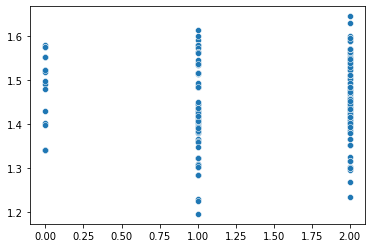

In [36]:
sns.scatterplot(Y_test, Y_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


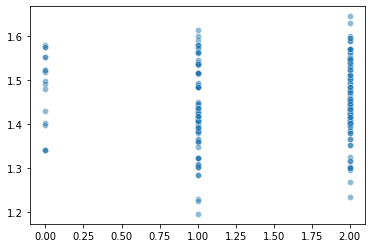

In [37]:
sns.scatterplot(Y_test, Y_pred, alpha=0.5)